Here's a J implementation (code on [GitHub](https://github.com/reckbo/Mackay03)) to compute
the joint and conditional probability distributions of bigrams in the Linux FAQ, as shown in
section 2.1 of 
[Information Theory, Inference, and Learning Algorithms (Mackay 2003)](http://www.inference.phy.cam.ac.uk/mackay/itila/),

First, enumerate the 27x27 valid bigrams, i.e. those consisting of letters and/or spaces, and
show them as a matrix where $i$ represents the first letter and $j$ represents the second letter:

In [25]:
9!:37 [ 0 70 14 14 NB. output formatting: 130 width, 14 head and tail
ALPHABET=: a. {~ 97+i.26
] 27 27 $ BIGRAMS=: , <@,"0/~ ALPHABET,~' '

┌──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬...
│  │ a│ b│ c│ d│ e│ f│ g│ h│ i│ j│ k│ l│ m│ n│ o│ p│ q│ r│ s│ t│ u│ v│...
├──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│a │aa│ab│ac│ad│ae│af│ag│ah│ai│aj│ak│al│am│an│ao│ap│aq│ar│as│at│au│av│...
├──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│b │ba│bb│bc│bd│be│bf│bg│bh│bi│bj│bk│bl│bm│bn│bo│bp│bq│br│bs│bt│bu│bv│...
├──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│c │ca│cb│cc│cd│ce│cf│cg│ch│ci│cj│ck│cl│cm│cn│co│cp│cq│cr│cs│ct│cu│cv│...
├──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│d │da│db│dc│dd│de│df│dg│dh│di│dj│dk│dl│dm│dn│do│dp│dq│dr│ds│dt│du│dv│...
├──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│e │ea│eb│ec│ed│ee│ef│eg│eh│ei│ej│ek│el│em│en│eo│ep│eq│er│es│et│eu│ev│...
├──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│f │fa│fb│fc│fd│fe│ff│fg│fh│fi│fj│fk│f

Next, get all the bigrams from the Linux FAQ, along with their counts:

In [26]:
FAQ=.tolower fread'linuxfaq.txt'
]FAQbigrams=. |: /:~ (~. ,. <@#/.~)  BIGRAMS , 2 <\  FAQ 

┌────┬───┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬──┬...
│    │   │ "│ #│ $│ '│ (│ )│ ,│ -│ .│ /│ 1│ 2│ 3│ 4│ 5│ 6│ 7│ 8│ 9│ >│...
├────┼───┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼──┼...
│1131│865│12│8 │3 │4 │19│1 │1 │42│10│25│37│7 │4 │3 │5 │6 │2 │2 │2 │1 │...
└────┴───┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴──┴...


(we append `BIGRAMS` to make sure there are at least one of every valid bigram in `FAQbigrams`, then
we decrement the counts later).

Now filter the FAQ bigrams for valid ones only, and normalize the counts to get a joint
probability, shown as a 27x27 matrix $$\mathbf{P}_{ij} = Pr(i,j)$$.

In [27]:
]P=. (% +/@:,) <: every 27 27&$ {: (#"1~ BIGRAMS e.~ {.) FAQbigrams

  0.0647533   0.0166929  0.00409857  0.00756382  0.00654433   0.003238...
 0.00404193  1.54469e_5  0.00218831  0.00255388  0.00229129  4.11917e_...
0.000468555 0.000726003  1.54469e_5 0.000180214 0.000123575  0.0022140...
0.000679663  0.00318721  2.05958e_5 0.000623024  9.78302e_5  0.0030842...
  0.0103752 0.000911366  4.63406e_5  8.75323e_5  0.00074145  0.0049069...
  0.0280618  0.00238397 0.000571534  0.00353734  0.00538581  0.0019926...
  0.0047113  0.00083928           0  3.08938e_5 0.000190511 0.00094740...
 0.00354248 0.000365576  1.02979e_5 0.000242001  1.02979e_5  0.0028628...
 0.00271865  0.00478853           0  5.14896e_6  9.78302e_5   0.015529...
0.000705407  0.00143141  0.00205443  0.00287827  0.00105039  0.0016940...
          0 0.000133873  5.14896e_6           0           0 0.00032438...
 0.00151894 0.000375874  4.11917e_5  1.54469e_5  8.75323e_5  0.0028834...
 0.00423759  0.00246635  8.23834e_5  5.14896e_5  0.00116881  0.0066215...
 0.00226554  0.00557117 0.000751748 0.

Now we can compute the conditional probabilities and visualize the results.
To match the figures in the book, we need to first move the first column and row
to the last column and row as that's where the space is represented.  Second,
we need a function to make white squares that are proportional in size to the probabilities.

In [28]:
NB. credit to Raul Miller http://jsoftware.com/pipermail/programming/2015-January/040848.html
SQUARE=: (>./~|i:12)%12
matrix2squares=: 1&$: : (4 : ',/ 0 |: ,/ 0 2|: y >:/ (SQUARE % x)')
switchLastColRow=.(}."1 ,. {."1)@:(}. , {.)

Now we can visualize the joint probability $Pr(i,j)$

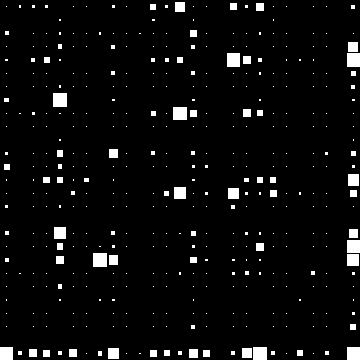

In [29]:
load'viewmat'
viewmat 80 matrix2squares switchLastColRow P

and the probability of the second letter given the first $Pr(j|i)$, by
dividing each row by its sum:

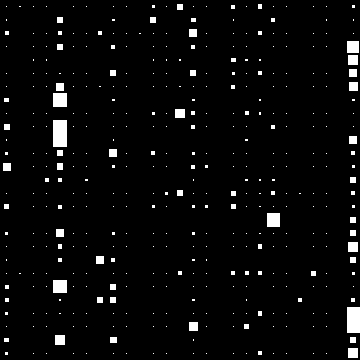

In [30]:
viewmat 2.5 matrix2squares switchLastColRow (% +/"1) P

and the probability of the first letter given the second $Pr(i|j)$, by
dividing each column by its sum:

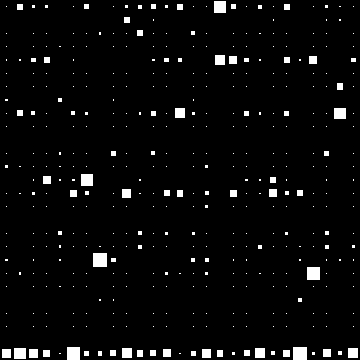

In [31]:
viewmat 2.5 matrix2squares switchLastColRow (% +/"1)&.|: P